### Upload files in Google Colab


In [12]:
from google.colab import files
uploaded = files.upload()
%ls

sample_data/     test_labels.csv   train_labels.csv
test_inputs.csv  train_inputs.csv


### Import libraries 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

### Function: load_knn_data

This function loads the data for KNN from a local drive into RAM

Outputs:

*   **train_inputs**: numpy array of N training data points x M features
*   **train_labels**: numpy array of N training labels
*   **test_inputs**: numpy array of N' test data points x M features
*   **test_labels**: numpy array of N' test labels




  



In [14]:
def load_knn_data():
  test_inputs = np.genfromtxt('test_inputs.csv', delimiter=',')
  test_labels = np.genfromtxt('test_labels.csv', delimiter=',')
  train_inputs = np.genfromtxt('train_inputs.csv', delimiter=',')
  train_labels = np.genfromtxt('train_labels.csv', delimiter=',')
  return train_inputs, train_labels, test_inputs, test_labels

### Function: predict_knn

This function uses the KNN classifier to predict the label of a data point.

Inputs:
*   **x**: input data point for which we want to predict the label (numpy array of M features)
*   **inputs**: matrix of data points in which neighbours will be found (numpy array of N data points x M features)
*   **labels**: vector of labels associated with the data points  (numpy array of N labels)
*   **k_neighbours**: # of nearest neighbours that will be used

Output:
*   **predicted_label**: predicted label (integer)




In [15]:
def predict_knn(x, inputs, labels, k_neighbours):  
  dist = np.sqrt( np.sum((inputs-x)**2,axis=1))
  temp = (np.concatenate(([labels],[dist]),axis=0)).T
  temp= (temp[temp[:,1].argsort()]).astype(int)
  predicted_label = np.argmax(np.bincount(temp.T[0][:k_neighbours]) )
  return predicted_label

### Function: eval_knn

Function that evaluates the accuracy of the KNN classifier on a dataset.  The dataset to be evaluated consists of (inputs, labels).  The dataset used to find nearest neighbours consists of (train_inputs, train_labels).

Inputs:
*   **inputs**: matrix of input data points to be evaluated (numpy array of N data points x M features)
*   **labels**: vector of target labels for the inputs (numpy array of N labels)
*   **train_inputs**: matrix of input data points in which neighbours will be found (numpy array of N' data points x M features)
*   **train_labels**: vector of labels for the training inputs (numpy array of N' labels)
*   **k_neighbours**: # of nearest neighbours to be used (integer)

Outputs:
*   **accuracy**: percentage of correctly labeled data points (float)




In [16]:
def eval_knn(inputs, labels, train_inputs, train_labels, k_neighbours):
  predicted_labels=np.zeros(len(labels))
  for i in range(len(inputs)):
    predicted_labels[i] = predict_knn(inputs[i],train_inputs,train_labels,k_neighbours)
  accuracy = accuracy_score(predicted_labels, labels)
  
  return accuracy

### Function: train_knn

This function trains on various values of k to determine the best number of neighbours for KNN.

Inputs:
*   **hyperparameters**: list of hyperparameters where each hyperparameter is a different # of neighbours (list of integers)
*   **inputs**: matrix of data points to be used when searching for neighbours (numpy array of N data points by M features)
*   **labels**: vector of labels associated with the inputs (numpy array of N labels)

Outputs:
*   **best_hyperparam**: best # of neighbours for KNN (integer)
*   **best_accuracy**: accuracy achieved with best_hyperparam (float)
*   **accuracies**: vector of accuracies for the corresponding hyperparameters (numpy array of floats)





In [17]:
def train_knn(hyperparameters, inputs, labels):
  
  best_hyperparam = 0
  best_accuracy = 0
  accuracies = np.zeros(len(hyperparameters))

  for k in hyperparameters:
    predicted_labels=np.empty(len(labels))
    for x in range(len(inputs)):      
      predicted_labels[x] = predict_knn(inputs[x],inputs,labels,k)
    accuracies[k-1]=accuracy_score(predicted_labels, labels)
  # print(accuracies)
  best_hyperparam=np.argmax(accuracies[1:])+2 #index starts from 0 and ignoring the value of k=1, so shift twice
  best_accuracy = accuracies[best_hyperparam-1] #index is 1 less than k

  return best_hyperparam, best_accuracy, accuracies

### Function: plot_knn_accuracies

Function that plots the KNN accuracies for different # of neighbours (hyperparameters) based on cross validation

Inputs:
*   **accuracies**: vector of accuracies for the corresponding hyperparameters (numpy array of floats)
*   **hyperparams**: list of hyperparameters where each hyperparameter is a different # of neighbours (list of integers)


In [18]:
def plot_knn_accuracies(accuracies,hyperparams):
  plt.plot(hyperparams,accuracies)
  plt.ylabel('accuracy')
  plt.xlabel('k neighbours')
  plt.show()  

## Main KNN code

Load data.
Train of various values of k to find the best # of neighbours for KNN.
Plot accuracies for different # of neighbours.
Test KNN with the best # of neighbours.

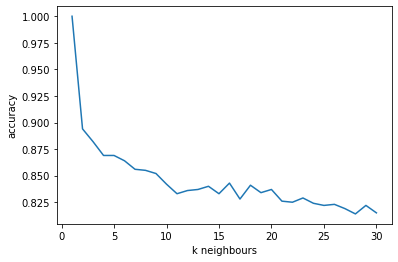

best # of neighbours k: 2
best cross validation accuracy: 0.894
test accuracy: 0.7181818181818181


In [19]:
# load data
train_inputs, train_labels, test_inputs, test_labels = load_knn_data()

# number of neighbours to be evaluated by cross validation
hyperparams = range(1,31)
best_k_neighbours, best_accuracy, accuracies = train_knn(hyperparams, train_inputs, train_labels)

# plot results
plot_knn_accuracies(accuracies, hyperparams)
print('best # of neighbours k: ' + str(best_k_neighbours))
print('best cross validation accuracy: ' + str(best_accuracy))

# evaluate with best # of neighbours
accuracy = eval_knn(test_inputs, test_labels, train_inputs, train_labels, best_k_neighbours)
print('test accuracy: '+ str(accuracy))